# WDSR

In [1]:
import os
import matplotlib.pyplot as plt

from data import Thermal
from model.nmodel import wdsr_b
from train import WdsrTrainer

%matplotlib inline

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

# config = ConfigProto()
# config.gpu_options.allow_growth = True
# session = InteractiveSession(config=config)

InternalError: CUDA runtime implicit initialization on GPU:0 failed. Status: out of memory

In [2]:
# Number of residual blocks
depth = 32

# Super-resolution factor
scale = 4

# Downgrade operator
downgrade = 'bicubic'

In [3]:
# Location of model weights (needed for demo)
weights_dir = f'weights/wdsr-b-{depth}-x{scale}'
weights_file = os.path.join(weights_dir, 'canweights.h5')

os.makedirs(weights_dir, exist_ok=True)

## Preprocessing the Image to Edge Form:

In [4]:
low_tr_dir=f'data/Thermal_train_LR_bicubic/X4'
high_tr_dir=f'data/Thermal_train_HR/'
low_vd_dir=f'data/Thermal_valid_LR_bicubic/X4'
high_vd_dir=f'data/Thermal_valid_HR/'

In [ ]:
os.makedirs("can_edge_data")

In [13]:
import cv2
import numpy as np
from scipy import misc
def edge_convert(input_dir):
    out_path = f'ncan_edge_data/'
    #os.makedirs('can_edge_data/Thermal_train_LR_bicubic/X4')
    out1 = 'ncan_edge_data/Thermal_train_LR_bicubic/X4'
    

    for image_dir in os.listdir(input_dir):
        # create the full input path and read the file
        input_path = os.path.join(input_dir, image_dir)
        # print(input_path)
        # input initial image for converting later
        initial_image = cv2.imread(input_path)
        if initial_image is None:
            continue
        # deprecate noise effect
        source = cv2.GaussianBlur(initial_image, (3, 3), 0)
        n_initial_image=cv2.cvtColor(source, cv2.COLOR_RGB2GRAY)
        ##################################################
        # Laplacian Edge Extractor #######################
        ##################################################
        lap_x = cv2.Laplacian(n_initial_image,cv2.CV_64F)
        ##################################################
        # Sobel Edge Extractor ###########################
        ##################################################
        sobelx = cv2.Sobel(n_initial_image,cv2.CV_64F,1,0,ksize=5)
        sobely = cv2.Sobel(n_initial_image,cv2.CV_64F,0,1,ksize=5)
        sobel = magnitude_computation(sobelx, sobely)
        ##################################################
        # Canny Edge Extractor ###########################
        ##################################################
        canny = cv2.Canny(n_initial_image,10,30,3)
        # concatenate together
        x = np.concatenate((n_initial_image, lap_x, sobel, canny), axis=1)        
        #print(out1)
        fullpath = os.path.join(out1,image_dir)
        cv2.imwrite(fullpath,x)

#===============================================================================================================================        
def edge_convert_ht(input_dir):
    out_path = f'ncan_edge_data/'
    #os.makedirs('can_edge_data/Thermal_train_HR')
    out1 = 'ncan_edge_data/Thermal_train_HR'
    
    
    for image_dir in os.listdir(input_dir):
        # create the full input path and read the file
        input_path = os.path.join(input_dir, image_dir)
        #print(input_path)

        # print(input_path)
        # input initial image for converting later
        initial_image = cv2.imread(input_path)
        if initial_image is None:
            continue
        # deprecate noise effect
        source = cv2.GaussianBlur(initial_image, (3, 3), 0)
        n_initial_image=cv2.cvtColor(source, cv2.COLOR_RGB2GRAY)
        ##################################################
        # Laplacian Edge Extractor #######################
        ##################################################
        lap_x = cv2.Laplacian(n_initial_image,cv2.CV_64F)
        ##################################################
        # Sobel Edge Extractor ###########################
        ##################################################
        sobelx = cv2.Sobel(n_initial_image,cv2.CV_64F,1,0,ksize=5)
        sobely = cv2.Sobel(n_initial_image,cv2.CV_64F,0,1,ksize=5)
        sobel = magnitude_computation(sobelx, sobely)
        ##################################################
        # Canny Edge Extractor ###########################
        ##################################################
        canny = cv2.Canny(n_initial_image,10,30,3)
        # concatenate together
        x = np.concatenate((n_initial_image, lap_x, sobel, canny), axis=1)        
        #print(out1)
        fullpath = os.path.join(out1,image_dir)
        cv2.imwrite(fullpath,x)


#================================================================================================================================
def edge_convert_lv(input_dir):
    out_path = f'ncan_edge_data/'
    #os.makedirs('can_edge_data/Thermal_valid_LR_bicubic/X4')
    out1 = 'ncan_edge_data/Thermal_valid_LR_bicubic/X4'
    
    for image_dir in os.listdir(input_dir):
        # create the full input path and read the file
        input_path = os.path.join(input_dir, image_dir)
        # print(input_path)
        # input initial image for converting later
        initial_image = cv2.imread(input_path)
        if initial_image is None:
            continue
        # deprecate noise effect
        source = cv2.GaussianBlur(initial_image, (3, 3), 0)
        n_initial_image=cv2.cvtColor(source, cv2.COLOR_RGB2GRAY)
        ##################################################
        # Laplacian Edge Extractor #######################
        ##################################################
        lap_x = cv2.Laplacian(n_initial_image,cv2.CV_64F)
        ##################################################
        # Sobel Edge Extractor ###########################
        ##################################################
        sobelx = cv2.Sobel(n_initial_image,cv2.CV_64F,1,0,ksize=5)
        sobely = cv2.Sobel(n_initial_image,cv2.CV_64F,0,1,ksize=5)
        sobel = magnitude_computation(sobelx, sobely)
        ##################################################
        # Canny Edge Extractor ###########################
        ##################################################
        canny = cv2.Canny(n_initial_image,10,30,3)
        # concatenate together
        x = np.concatenate((n_initial_image, lap_x, sobel, canny), axis=1)        
        #print(out1)
        fullpath = os.path.join(out1,image_dir)
        cv2.imwrite(fullpath,x)

#================================================================================================================================================
def edge_convert_hv(input_dir):
    out_path = f'ncan_edge_data/'
    #os.makedirs('can_edge_data/Thermal_valid_LR_bicubic/X4')
    out1 = 'ncan_edge_data/Thermal_valid_LR_bicubic/X4'
    
    for image_dir in os.listdir(input_dir):
        # create the full input path and read the file
        input_path = os.path.join(input_dir, image_dir)
        print(input_path)
        # print(input_path)
        # input initial image for converting later
        initial_image = cv2.imread(input_path)
        if initial_image is None:
            continue
        # deprecate noise effect
        source = cv2.GaussianBlur(initial_image, (3, 3), 0)
        n_initial_image=cv2.cvtColor(source, cv2.COLOR_RGB2GRAY)
        ##################################################
        # Laplacian Edge Extractor #######################
        ##################################################
        lap_x = cv2.Laplacian(n_initial_image,cv2.CV_64F)
        ##################################################
        # Sobel Edge Extractor ###########################
        ##################################################
        sobelx = cv2.Sobel(n_initial_image,cv2.CV_64F,1,0,ksize=5)
        sobely = cv2.Sobel(n_initial_image,cv2.CV_64F,0,1,ksize=5)
        sobel = magnitude_computation(sobelx, sobely)
        ##################################################
        # Canny Edge Extractor ###########################
        ##################################################
        canny = cv2.Canny(n_initial_image,10,30,3)
        # concatenate together
        x = np.concatenate((n_initial_image, lap_x, sobel, canny), axis=1)        
        #print(out1)
        fullpath = os.path.join(out1,image_dir)
        cv2.imwrite(fullpath,x)
#============================================================================================================================

def magnitude_computation(input_x, input_y):
    return np.sqrt(np.square(input_x)+np.square(input_y))

In [14]:
edge_convert(low_tr_dir)
edge_convert_ht(high_tr_dir)
edge_convert_lv(low_vd_dir)
edge_convert_hv(high_vd_dir)

data/Thermal_train_HR/6021.png
data/Thermal_train_HR/2597.png
data/Thermal_train_HR/0595.png
data/Thermal_train_HR/2660.png
data/Thermal_train_HR/1373.png
data/Thermal_train_HR/6513.png
data/Thermal_train_HR/3800.png
data/Thermal_train_HR/2932.png
data/Thermal_train_HR/0277.png
data/Thermal_train_HR/1391.png
data/Thermal_train_HR/5085.png
data/Thermal_train_HR/7772.png
data/Thermal_train_HR/7141.png
data/Thermal_train_HR/1721.png
data/Thermal_train_HR/3165.png
data/Thermal_train_HR/2725.png
data/Thermal_train_HR/0362.png
data/Thermal_train_HR/0242.png
data/Thermal_train_HR/6613.png
data/Thermal_train_HR/4820.png
data/Thermal_train_HR/3569.png
data/Thermal_train_HR/5043.png
data/Thermal_train_HR/3565.png
data/Thermal_train_HR/4798.png
data/Thermal_train_HR/2349.png
data/Thermal_train_HR/3538.png
data/Thermal_train_HR/0993.png
data/Thermal_train_HR/3545.png
data/Thermal_train_HR/0609.png
data/Thermal_train_HR/3928.png
data/Thermal_train_HR/3127.png
data/Thermal_train_HR/3461.png
data/The

## Training Part:

In [15]:
Thermal_train = Thermal(scale=scale, subset='train', downgrade=downgrade)
Thermal_valid = Thermal(scale=scale, subset='valid', downgrade=downgrade)

In [16]:
train_ds = Thermal_train.dataset(batch_size=16, random_transform=True)
valid_ds = Thermal_valid.dataset(batch_size=1, random_transform=False, repeat_count=1)

LR_Image Directory:
can_edge_data/Thermal_train_LR_bicubic/X4
Caching decoded images in can_edge_data\caches/Thermal_train_LR_bicubic_X4.cache ...
Cached decoded images in can_edge_data\caches/Thermal_train_LR_bicubic_X4.cache.
HR_Image Directory:
can_edge_data/Thermal_train_HR
Caching decoded images in can_edge_data\caches/Thermal_train_HR.cache ...
Cached decoded images in can_edge_data\caches/Thermal_train_HR.cache.
LR_Image Directory:
can_edge_data/Thermal_valid_LR_bicubic/X4
Caching decoded images in can_edge_data\caches/Thermal_valid_LR_bicubic_X4.cache ...
Cached decoded images in can_edge_data\caches/Thermal_valid_LR_bicubic_X4.cache.
HR_Image Directory:
can_edge_data/Thermal_valid_HR
Caching decoded images in can_edge_data\caches/Thermal_valid_HR.cache ...
Cached decoded images in can_edge_data\caches/Thermal_valid_HR.cache.


### Pre-trained models

If you want to skip training and directly run the demo below, download [weights-wdsr-b-32-x4.tar.gz](https://martin-krasser.de/sisr/weights-wdsr-b-32-x4.tar.gz) and extract the archive in the project's root directory. This will create a `weights/wdsr-b-32-x4` directory containing the weights of the pre-trained model.

In [17]:
trainer = WdsrTrainer(model=wdsr_b(scale=scale, num_res_blocks=depth), 
                      checkpoint_dir=f'.ckpt/can_edge_wdsr-b-{depth}-x{scale}')

In [18]:
# Train WDSR B model for 300,000 steps and evaluate model
# every 1000 steps on the first 10 images of the DIV2K
# validation set. Save a checkpoint only if evaluation
# PSNR has improved.
trainer.train(train_ds,
              valid_ds.take(10),
              steps=300000, 
              evaluate_every=1000, 
              save_best_only=True)

1000/300000: loss = 19.317, PSNR = 17.497423 (128.72s)
2000/300000: loss = 12.434, PSNR = 17.632095 (101.45s)
3000/300000: loss = 11.715, PSNR = 18.245434 (100.24s)
4000/300000: loss = 12.765, PSNR = 17.927423 (100.30s)
5000/300000: loss = 11.493, PSNR = 18.166866 (100.01s)
6000/300000: loss = 11.132, PSNR = 18.096338 (100.34s)
7000/300000: loss = 610.786, PSNR = 16.877048 (99.91s)
8000/300000: loss = 14.105, PSNR = 17.137165 (99.60s)
9000/300000: loss = 13.492, PSNR = 17.208532 (99.79s)
10000/300000: loss = 12.972, PSNR = 17.329157 (99.79s)
11000/300000: loss = 12.825, PSNR = 17.132410 (98.89s)
12000/300000: loss = 12.775, PSNR = 17.655865 (99.65s)
13000/300000: loss = 12.547, PSNR = 17.652430 (99.78s)
14000/300000: loss = 12.493, PSNR = 17.652134 (99.41s)
15000/300000: loss = 12.337, PSNR = 17.974323 (99.73s)
16000/300000: loss = 11.799, PSNR = 17.875330 (100.16s)
17000/300000: loss = 12.175, PSNR = 17.190899 (100.05s)
18000/300000: loss = 11.654, PSNR = 17.719011 (99.82s)
19000/3000

In [19]:
# Restore from checkpoint with highest PSNR
trainer.restore()

Model restored from checkpoint at step 294000.


In [20]:
# Evaluate model on full validation set
psnr = trainer.evaluate(valid_ds)
print(f'PSNR = {psnr.numpy():3f}')

PSNR = 17.876575


In [22]:
# Save weights to separate location (needed for demo)
weights_dir = f'weights/wdsr-b-{depth}-x{scale}'
weights_file = os.path.join(weights_dir, 'can_edgeweights.h5')
trainer.model.save_weights(weights_file)

## Demo

In [23]:
model = wdsr_b(scale=scale, num_res_blocks=depth)
model.load_weights(weights_file)

In [ ]:
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [44]:
from model import resolve_single
from utils import load_image, plot_sample
import cv2
import numpy as np
import tensorflow as tf
from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
import cv2

def resolve_and_plot(lr_image_path, hr_image_path):
    lr = load_image(lr_image_path)
    lr = cv2.cvtColor(lr, cv2.COLOR_GRAY2BGR)
    hr = load_image(hr_image_path)
    sr = resolve_single(model, lr)
    #print(hr.shape)
    #print(sr.shape)    
    plot_sample(lr, sr, hr)
    mse = tf.keras.losses.MeanSquaredError()
    sr2 = cv2.cvtColor(np.float32(sr), cv2.COLOR_BGR2GRAY)
    ssim_e = ssim(sr2, hr, data_range=hr.max() - hr.min())
    print(ssim_e)
    #err = mse(hr, sr2).numpy()
    #print("The mean square error of the two images is:")
    #print(err)
    

0.3968562500781382


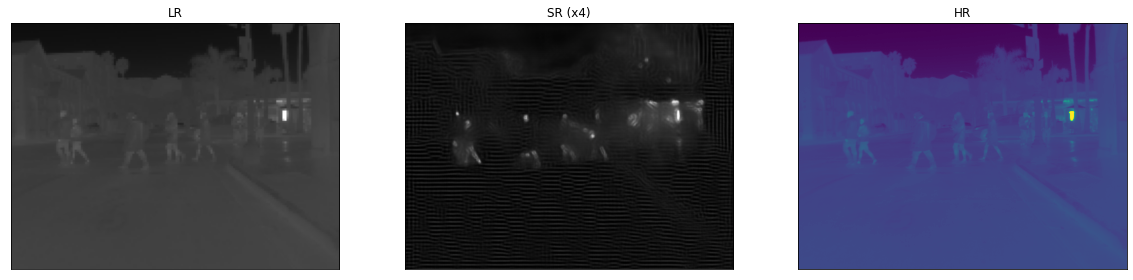

In [45]:
resolve_and_plot('demo/0004x4.png','demo/0004.png')

0.45558101532333406


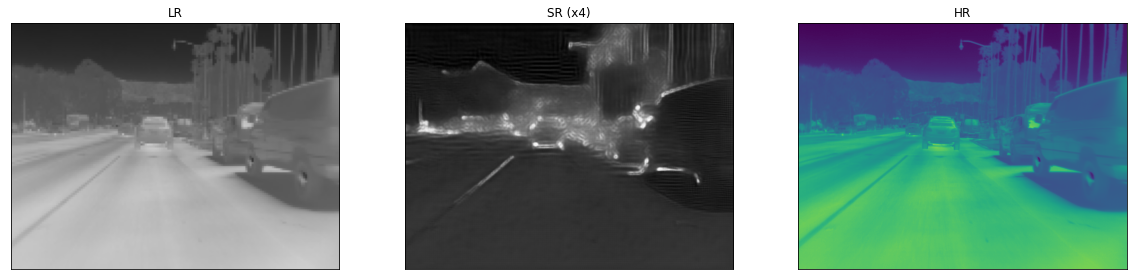

In [46]:
resolve_and_plot('demo/1064x4.png','demo/1064.png')

0.33273687642518585


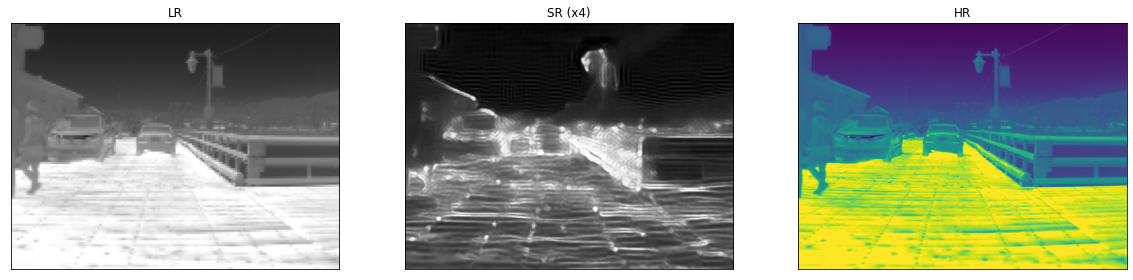

In [47]:
resolve_and_plot('demo/0303x4.png','demo/0303.png')